In [1]:
import keras
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


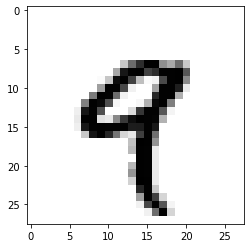

In [4]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
# 훈련 시 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 배열로 변환
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
# 레이블을 범주형으로 인코딩
# 훈련 데이터가 n개, 클래스가 k개 일때 to_categorical 함수는 입력받은 n크기의 1차원 정수 배열을 (n, k)크기의 2차원 배열로 변경
# 이 배열의 두번째 차원의 인덱스가 클래스 값 의미
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 훈련 데이터로 모델 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2570 - accuracy: 0.9256
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1033 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0673 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0373 - accuracy: 0.9888


In [9]:
# 테스트 데이터로 정확도 측정
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 19us/step
test_acc: 0.9800000190734863
